In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [71]:
df = pd.read_csv("data.csv")
df.head(8)

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175


Text(0.5, 1.0, 'Weigth vs Height')

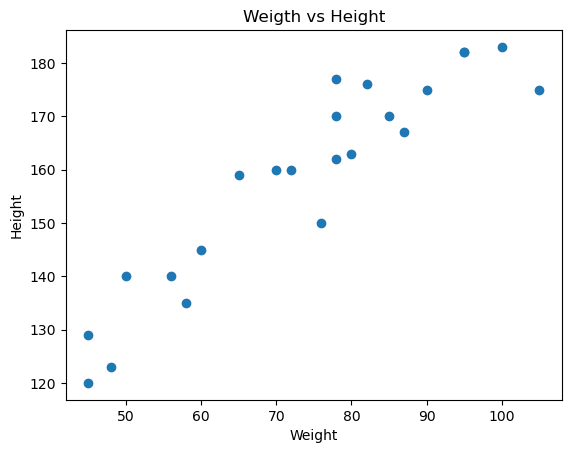

In [72]:
## Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title("Weigth vs Height")

In [73]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


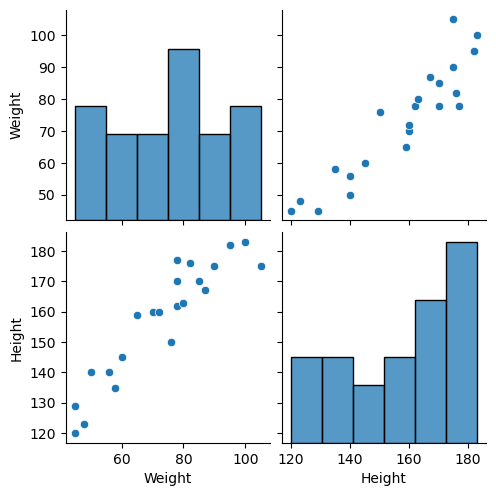

In [74]:
sns.pairplot(df)

#### Independent feature should be in dataframe or two dimentional array
#### Dependent feature should be in series or one dimentional array

In [75]:
## Independent and dependent features
X = df[["Weight"]]
y = df["Height"]


In [76]:
np.array(X).shape ## here x is a dataframe so it will be a 2d array when we convert it.

(23, 1)

In [77]:
np.array(y).shape  ## here y is  a series so it will be a 1d array when we convert it.

(23,)

#### Making train data and test data

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [79]:
print(f"X_train_shape ={X_train.shape}")
print(f"X_test_shape ={X_test.shape}")
print(f"y_train_shape ={y_train.shape}")
print(f"y_test_shape ={y_test.shape}")

X_train_shape =(17, 1)
X_test_shape =(6, 1)
y_train_shape =(17,)
y_test_shape =(6,)


## Standardization

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

we use tranform instead of fittransform for test data because the mean and median of train data set is used in the tranform function.if we use fit transform in test data the mean and median of test data is used in that transformation 

In [81]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [83]:
## Apply simple Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1) ## n_jobs=-1 means it will use all the cpu cores and n_jobs=1 means it will use only 1 core at a time
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [87]:
print(f"Coefficent:{regression.coef_}")
print(f"Intercept:{regression.intercept_}")

Coefficent:[17.2982057]
Intercept:156.47058823529412


Text(0.5, 1.0, 'Train_data vs Best_fit ')

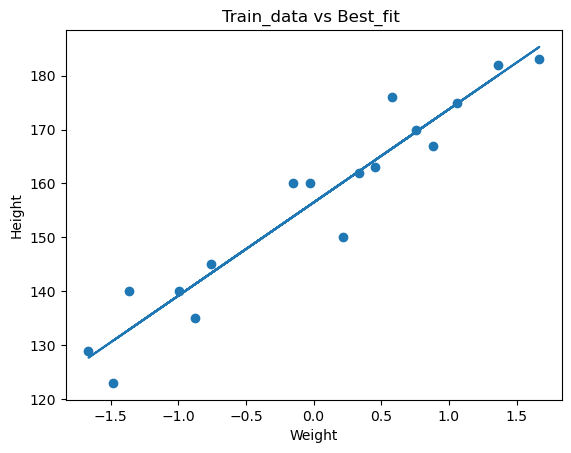

In [93]:
## plotting train data vs best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Train_data vs Best_fit ")

### Prediction of test data
1. predict_height = intercept + cofficent*(x_test)
2. predict = 156.47058823529412 +17.2982057*(x_test)



In [95]:
### Predictiono of test data
y_predict = regression.predict(X_test)
y_predict

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [99]:
## Performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [101]:
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
rmse =np.sqrt(mse)
print(f"mse:{mse}")
print(f"mae:{mae}")
print(f"rmse:{rmse}")


mse:114.84069295228699
mae:9.665125886795005
rmse:10.716374991212605


## R-Square
Formula

**R^2 = 1 - SSR/SST** 

R^2 = coefficient of determination
SSR = sum of squares of residuals
SST = total sum of squares

In [104]:
from sklearn.metrics import r2_score


In [107]:
score = r2_score(y_test,y_predict)
print(score)

0.7360826717981276


## **Adjusted R2 =1 - [(1-R2)*(n-1)/(n-k-1)]**

where
R2: The R2 of the model   n:The number of observation   k:The number of predictor variables

In [108]:
1-(1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)

0.6701033397476595

### OLS Linear Regression

In [109]:
import statsmodels.api as sm

In [115]:
model = sm.OLS(y_train,X_train).fit()

In [117]:
prediction = model.predict(X_test)
print(f"prediction:{prediction}")

prediction:[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [119]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 23 Mar 2025   Prob (F-statistic):                       0.664
Time:                        21:43:05   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [122]:
### Prediction of new data
regression.predict(scaler.transform([[72]]))

/home/aadharsh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])